# Project: Wrangling and Analyze Data

## Data Analyst: Esosa O.

## Table of Contents
<ul>
<li><a href="#intro">Data Gathering</a></li>
<li><a href="#wrangling">Assessing Data</a></li>
<li><a href="#eda">Cleaning Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
##To carry out this project, we will leverage on the power of Python and its packages
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline
sns.set_theme(style="darkgrid")

## 1.0. Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#gathering data from downloaded file on hand
archive_df = pd.read_csv(r"C:\Users\esosa\Downloads\twitter-archive-enhanced (1).csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#gathering data programmatically from provided url using requests library
folder = 'image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#writing response content into a file and then loading the file into a new dataframe
with open('image_predictions.tsv',mode='wb') as file:
        file.write(response.content)
        
#importing the tweet predictions TSV file which we have downloaded programmatically and written to a file into a pandas dataframe
image_pred_df = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#importing twitter data from the Twitter api
consumer_key= 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
#creating an array of tweet_ids
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [13]:
#Querying the api and saving each tweet's returned JSON as a new line in a .txt file

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:  #I am using v4.10.0 of tweepy
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Rate limit reached. Sleeping for: 340


Success
1086: 738184450748633089
Success
1087: 738166403467907072
Success
1088: 738156290900254721
Success
1089: 737826014890496000
Success
1090: 737800304142471168
Success
1091: 737678689543020544
Success
1092: 737445876994609152
Success
1093: 737322739594330112
Success
1094: 737310737551491075
Success
1095: 736736130620620800
Success
1096: 736392552031657984
Success
1097: 736365877722001409
Success
1098: 736225175608430592
Success
1099: 736010884653420544
Success
1100: 735991953473572864
Success
1101: 735648611367784448
Success
1102: 735635087207878657
Success
1103: 735274964362878976
Success
1104: 735256018284875776
Success
1105: 735137028879360001
Success
1106: 734912297295085568
Success
1107: 734787690684657664
Success
1108: 734776360183431168
Success
1109: 734559631394082816
Success
1110: 733828123016450049
Success
1111: 733822306246479872
Success
1112: 733482008106668032
Success
1113: 733460102733135873
Success
1114: 733109485275860992
Success
1115: 732732193018155009
Success
11

Success
1335: 705428427625635840
Success
1336: 705239209544720384
Success
1337: 705223444686888960
Success
1338: 705102439679201280
Success
1339: 705066031337840642
Success
1340: 704871453724954624
Success
1341: 704859558691414016
Success
1342: 704847917308362754
Success
1343: 704819833553219584
Success
1344: 704761120771465216
Success
1345: 704499785726889984
Success
1346: 704491224099647488
Success
1347: 704480331685040129
Success
1348: 704364645503647744
Success
1349: 704347321748819968
Success
1350: 704134088924532736
Success
1351: 704113298707505153
Success
1352: 704054845121142784
Success
1353: 703774238772166656
Success
1354: 703769065844768768
Success
1355: 703631701117943808
Success
1356: 703611486317502464
Success
1357: 703425003149250560
Success
1358: 703407252292673536
Success
1359: 703382836347330562
Success
1360: 703356393781329922
Success
1361: 703268521220972544
Success
1362: 703079050210877440
Success
1363: 703041949650034688
Success
1364: 702932127499816960
Success
13

Success
1584: 687102708889812993
Success
1585: 687096057537363968
Success
1586: 686947101016735744
Success
1587: 686760001961103360
Success
1588: 686749460672679938
Success
1589: 686730991906516992
Success
1590: 686683045143953408
Success
1591: 686618349602762752
Success
1592: 686606069955735556
Success
1593: 686394059078897668
Success
1594: 686386521809772549
Success
1595: 686377065986265092
Success
1596: 686358356425093120
Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
16

Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
1862: 675483430902214656
Success
18

Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
2087: 670803562457407488
Success
2088: 670797304698376195
Success
2089: 670792680469889025
Success
2090: 670789397210615808
Success
2091: 670786190031921152
Success
2092: 670783437142401025
Success
2093: 670782429121134593
Success
2094: 670780561024270336
Success
2095: 670778058496974848
Success
2096: 670764103623966721
Success
2097: 670755717859713024
Success
2098: 670733412878163972
Success
2099: 670727704916926465
Success
2100: 670717338665226240
Success
2101: 670704688707301377
Success
2102: 670691627984359425
Success
2103: 670679630144274432
Success
2104: 670676092097810432
Success
2105: 670668383499735048
Success
2106: 670474236058800128
Success
2107: 670468609693655041
Success
2108: 670465786746662913
Success
2109: 670452855871037440
Success
2110: 670449342516494336
Success
2111: 670444955656130560
Success
21

Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
2336: 666287406224695296
Success
2337: 666273097616637952
Success
2338: 666268910803644416
Success
2339: 666104133288665088
Success
2340: 666102155909144576
Success
2341: 666099513787052032
Success
2342: 666094000022159362
Success
2343: 666082916733198337
Success
2344: 666073100786774016
Success
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
2506.7392285
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 No

In [14]:
#Next, we creat a list of dictionaries for the json data

list_dict = []
with open ("tweet_json.txt", 'r') as json_file:
    for line in json_file:
        api_data = json.loads(line)
        
        list_dict.append({'tweet_id':api_data['id'], 'place': api_data['place'],'retweet_count':api_data['retweet_count'],
                     'favorite_count':api_data['favorite_count']})

In [15]:
api_data_df = pd.DataFrame(list_dict, columns = ['tweet_id', 'place', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [16]:
#First, we view each of our dataframes to assess them visually
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [20]:
#Hmm, it looks like there are some invalid names in the name column, e.g.'a' in the archive_df.tail()shown above
# It also looks like the valid names are capitalized while the invalid names are in lowercase. Let's confirm: 

invalid_names = archive_df.name.str.contains('^[a-z]', regex = True)
archive_df[invalid_names].name.value_counts().sort_index()
archive_df[invalid_names].name.value_counts().sum()

109

In [21]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
api_data_df.head()

,tweet_id,place,retweet_count,favorite_count
0,892420643555336193,None,7015,33836
1,892177421306343426,None,5302,29348
2,891815181378084864,None,3484,22070
3,891689557279858688,None,7229,36960
4,891327558926688256,None,7768,35338


## Quality issues

### Visual Assessment
1. There are invalid names in the 'name' column of the archive_df. Specifically,there are  a total of 109 lower-case entries which are invalid names (e.g 'a','an', 'actually', 'the'etc)

2. There are extraneous html tags in the 'source'column of the archive_df which are not necessary and prevent us from easily seeing the device/source from which the tweet was sent

### Programmatic Assessment
3. From the output of archive_df.info(), there are 181 rows in the archive_df where retweeted_status_id is non-null, i.e. there are 181 retweets in the dataframe. We only need original tweets and not retweets.

4. There are 78 tweets in the archive_df which are replies, and thus, not original tweets

5. Some columns have the wrong datatype, e.g. timestamp column in the archive_df is an object/string and not a datetime datatype

6. The highest rating numerator in the archive_df is 1776 which is a huge outlier

7. The highest denominator is 170 which is another huge outlier as denominators are supposed to be 10.

8. Output of image_pred_df.info() shows that there are 2,075 tweet ids in the image prediction dataframe, compared to 2,356 tweet ids in the downloaded tweet archive dataframe, i.e, there is some missing data. Specifically, 281 tweet_ids found in the archive_df are missing from the image_pred_df.

### Tidiness issues
1. There are four columns for doggo, floofer, pupper and puppo, instead of one column for dog_stages which can take any of the four values

2. The retweet_count and favorite_count columns from api_data_df should be included in the archive_df table

3. A new column called dog_breed should be extracted from the image_pred_df and included in the archive_df table - (this issue will not be cleaned)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
archive = archive_df.copy()
prediction = image_pred_df.copy()
api = api_data_df.copy()

In [26]:
api.head()

,tweet_id,place,retweet_count,favorite_count
0,892420643555336193,None,7015,33836
1,892177421306343426,None,5302,29348
2,891815181378084864,None,3484,22070
3,891689557279858688,None,7229,36960
4,891327558926688256,None,7768,35338


### Issue #1: Invalid Names in 'name' column of archive_df

#### Define: Replace lowercase names which are invalid with 'None' using df.loc()

#### Code

In [27]:
archive.loc[invalid_names, 'name'] = "None"

#### Test

In [28]:
archive.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

### Issue #2: Extraneous html tags in 'source' column of archive dataframe

#### Define: Strip extraneous html tags from the source column using str.extract and retain only the text between the tags

#### Code

In [32]:
archive['source'] = archive['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [33]:
archive.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

### Issue #3: 181 retweets included in the archive df

#### Define: Drop the retweets using boolean masking

#### Code

In [34]:
archive = archive[archive.retweeted_status_id.isnull()==True]

#### Test

In [35]:
archive.info()
#all columns related to retweeted data now contain only null data, i.e. the dataframe no longer contains retweets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #4: 78 tweet replies are included in the archive dataframe

#### Define: Delete the replies using boolean masking.

#### Code

In [36]:
archive = archive[archive.in_reply_to_status_id.isnull()==True]

#### Test

In [37]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Bonus Issue#: The archive dataframe now contains columns which are full of only null data and thus can be dropped, i.e. retweet and null columns should all be dropped. 

#### Define: Drop null columns using pd.drop()

#### Code

In [38]:
archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 
                  'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [39]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #5: Some columns have the wrong datatype 

#### Define: Change the datatype of the 'timestamp' column in the archive dataframe using pd.to_datetime

#### Code

In [40]:
archive.timestamp = pd.to_datetime(archive.timestamp)

#### Test

In [41]:
archive.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #6: The highest numerator in the archive dataframe is 1,776 which is a huge outlier that can skew our analysis 

#### Define: Delete the outliers if there are only relatively few of them

In [42]:
#To find out how many times a numerator appears: 

archive.rating_numerator.value_counts(normalize=True).sort_values(ascending=False)

12      0.231760
10      0.207916
11      0.196948
13      0.136862
9       0.072961
8       0.046733
7       0.024797
14      0.018121
5       0.016214
6       0.015260
3       0.009061
4       0.007630
2       0.004292
1       0.002384
24      0.000477
84      0.000477
75      0.000477
0       0.000477
165     0.000477
1776    0.000477
204     0.000477
50      0.000477
99      0.000477
88      0.000477
80      0.000477
60      0.000477
44      0.000477
121     0.000477
26      0.000477
144     0.000477
45      0.000477
27      0.000477
420     0.000477
Name: rating_numerator, dtype: float64

In [43]:
# Based on the percentages above, about 98.7% of the numerator ratings in the archive dataframe are between 0-14, i.e. 
# only 1.3% of tweet rating numerators are greater or equal to 15. Hence, they can be dropped

#### Code

In [45]:
archive = archive[archive.rating_numerator<15]

#### Test

In [48]:
archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.079000e+03,2079.000000,2079.000000
mean,7.366465e+17,10.595960,10.001924
std,6.724943e+16,2.168615,0.282632
min,6.660209e+17,0.000000,2.000000
25%,6.766970e+17,10.000000,10.000000
50%,7.095662e+17,11.000000,10.000000
75%,7.880951e+17,12.000000,10.000000
max,8.924206e+17,14.000000,20.000000


In [ ]:
#Now, the highest rating_numerator in the archive dataframe is 14, as all outliers have been removed

### Issue #7: The highest denominator in the archive dataframe is 170 which is another huge outlier that can skew our analysis 

#### Define: Delete all tweet ids with rating denominator that are not equal to 10 with boolean masking

#### Code

In [49]:
archive = archive[archive.rating_denominator==10]

#### Test

In [50]:
archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.075000e+03,2075.000000,2075.0
mean,7.367111e+17,10.606265,10.0
std,6.728544e+16,2.153837,0.0
min,6.660209e+17,0.000000,10.0
25%,6.766970e+17,10.000000,10.0
50%,7.095662e+17,11.000000,10.0
75%,7.881644e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


### Issue #8: Missing Data - Some tweet IDs in archive dataframe are not in image prediction dataframe. 

#### Define: Find out how much missing data there is, and if it is not significant, drop missing data by using df.isin for masking

In [62]:
len(archive[~archive.tweet_id.isin(prediction.tweet_id)])

126

In [63]:
#There are 126 tweets in the archive dataframe whose image data is not in the prediction dataframe
#We will therefore drop any tweets for which we do not have image predictions

#### Code

In [64]:
archive = archive[archive.tweet_id.isin(prediction.tweet_id)]

#### Test

In [65]:
len(archive[~archive.tweet_id.isin(prediction.tweet_id)])

0

### Tidiness Issue #1: There are four columns for doggo, floofer, pupper and puppo, instead of one column for dog_stages which can take any of the four values

#### Define: This problem will be cleaned in three steps: 
1. First, create an extra column for the dogs which do not have a dog stage and call this column unknown
2. use pd.melt() to melt the different stages into a new column called dog_stage with 5 possible values
3. Clean up our melted column and drop duplicate values

#### Code

In [67]:
#First, we create an extra column for the dogs for which no dog stage was recorded. 
def y(row):
    if row ['doggo'] == 'None' and row ['puppo'] == 'None'and row ['floofer'] == 'None' and row ['pupper'] == 'None':
        value = 'unknown'
    else:
        value ='none'
    return value

archive['unknown'] = archive.apply(y, axis=1)

In [68]:
archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,unknown
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,unknown


In [69]:
#Next, we melt the different stages into a new column:
melt = pd.melt(archive, id_vars=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator',
                                              'rating_denominator','name'], var_name='dog_stage', value_name='value')

In [70]:
#Now we clean up the duplicated rows:
melt = melt[melt['value']!= 'None']
melt = melt.drop('value', axis=1)

#### Test

In [71]:
#We view the total count of the unique values in the newly created dog_stage column to confirm that our cleaning worked
melt.dog_stage.value_counts()

unknown    1949
pupper      208
doggo        73
puppo        23
floofer       8
Name: dog_stage, dtype: int64

### Tidiness Issue #2: Archive and api dataframes have tweet_ids in common and should be merged as the information in the api dataframe relates to the archive dataframe. 

#### Define: Join melted dataframe (variable named melt) to the api dataframe, joining on tweet_id

#### Code

In [72]:
archive_clean = pd.merge(melt, api, on = 'tweet_id', how='left')

#### Test

In [73]:
archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,place,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,6103.0,27978.0
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,2507.0,17952.0
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,4565.0,24096.0


In [79]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261 entries, 0 to 2260
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2261 non-null   int64              
 1   timestamp           2261 non-null   datetime64[ns, UTC]
 2   source              2261 non-null   object             
 3   text                2261 non-null   object             
 4   expanded_urls       2261 non-null   object             
 5   rating_numerator    2261 non-null   int64              
 6   rating_denominator  2261 non-null   int64              
 7   name                2261 non-null   object             
 8   dog_stage           2261 non-null   object             
 9   place               1 non-null      object             
 10  retweet_count       2252 non-null   float64            
 11  favorite_count      2252 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [80]:
### We still need to do some cleaning based on the archive_clean.info() output above
#dropping place column completely since it only has 1 non-null observation
archive_clean.drop(labels='place', axis=1, inplace=True)

In [83]:
#Now we drop the tweet IDs which do not have retweet/favorite count
archive_clean.dropna(inplace=True)

In [84]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2260
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2252 non-null   int64              
 1   timestamp           2252 non-null   datetime64[ns, UTC]
 2   source              2252 non-null   object             
 3   text                2252 non-null   object             
 4   expanded_urls       2252 non-null   object             
 5   rating_numerator    2252 non-null   int64              
 6   rating_denominator  2252 non-null   int64              
 7   name                2252 non-null   object             
 8   dog_stage           2252 non-null   object             
 9   retweet_count       2252 non-null   float64            
 10  favorite_count      2252 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 211.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [86]:
#For analysis, we start by creating a new dataframe with the wrangled and cleaned data

In [87]:
df = pd.read_csv('twitter_archive_master.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2252 non-null   int64  
 1   timestamp           2252 non-null   object 
 2   source              2252 non-null   object 
 3   text                2252 non-null   object 
 4   expanded_urls       2252 non-null   object 
 5   rating_numerator    2252 non-null   int64  
 6   rating_denominator  2252 non-null   int64  
 7   name                2252 non-null   object 
 8   dog_stage           2252 non-null   object 
 9   retweet_count       2252 non-null   float64
 10  favorite_count      2252 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 193.7+ KB


In [89]:
df.timestamp = pd.to_datetime(df.timestamp)

In [90]:
#Creating a year column so that we can carry out analysis on an annual basis
df['year']=pd.to_datetime(df['timestamp']).dt.year

In [111]:
#How has average favorite count changed over time? Considering we can use favorite count as a proxy for engagement with 
#We_rate_dogs Twitter Handle
df.groupby('year')['favorite_count'].mean().sort_values(ascending=True)

year
2015     2193.286517
2016     6960.848270
2017    21379.370460
Name: favorite_count, dtype: float64

In [107]:
#What is the most popular source for tweets?
df['source'].value_counts(normalize=True)

Twitter for iPhone    0.982238
Twitter Web Client    0.012877
TweetDeck             0.004885
Name: source, dtype: float64

In [108]:
#What is the most popular content on the We_rate_dogs page? i.e. which dog stage gets the most favorites, on the average?
dog_by_stage = df.groupby('dog_stage')
dog_by_stage['favorite_count'].median().sort_values(ascending=False)

dog_stage
puppo      13356.0
doggo      10219.0
floofer    10054.0
unknown     3478.0
pupper      2854.0
Name: favorite_count, dtype: float64

In [110]:
#which dog stage gets the highest ratings?
rating_by_dog_stage = df.groupby('dog_stage')
dog_by_stage['rating_numerator'].mean().sort_values(ascending=False)

dog_stage
puppo      12.043478
floofer    11.875000
doggo      11.777778
pupper     10.649038
unknown    10.532200
Name: rating_numerator, dtype: float64

In [143]:
#Do people connect more to dogs with names than unnamed dogs? 
#We can compare the median retweet and favorite/like counts for named and unnamed dogs. 
round(df.retweet_count[df.name != 'None'].median())

1252

In [140]:
round(df.retweet_count[df.name == 'None'].median())

946

In [141]:
round(df.favorite_count[df.name == 'None'].median())

2792

In [142]:
round(df.favorite_count[df.name != 'None'].median())

4191

#### As seen above, dogs with names (i.e. dogs whose names are not 'None' got higher retweets (1,252 vs 946) and more likes/favorites (4,191 vs 2,792) than dogs without names. 

> People connected more to dogs with names than they did to unnamed dogs.

### Insights:
1. The level of engagement of the We_rate_dogs twitter handle has been growing over time, with average number of times people favorite posted tweets rising over time. This shows that engagement has been rising.


2. There is a relationship between dog_stage and level of affininty from users - on the average, dogs in the puppo stage received the highest ratings and the most favorites from users.


3. The most used source for posting dog content was Twitter for iphone which makes sense considering that the iPhone is a mobile device and thus very handy for people to take photographs of their pets.


4. Dogs with names got a higher level of engagement (more retweets and favorites) than dogs without names.

### Visualization

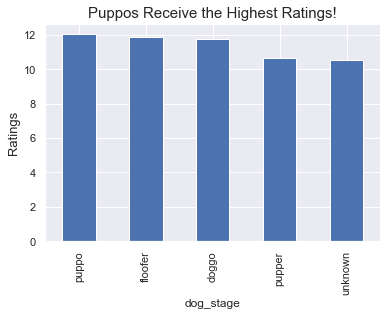

In [113]:
rating_by_dog_stage = df.groupby('dog_stage')
dog_by_stage['rating_numerator'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title("Puppos Receive the Highest Ratings!",fontsize=15)
plt.ylabel("Ratings",fontsize= 13);

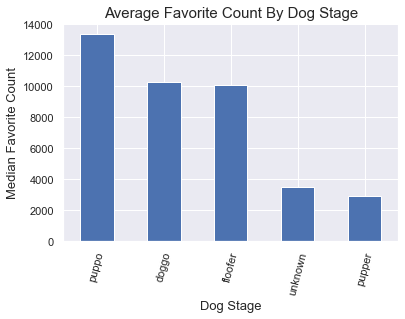

In [115]:
dog_by_stage = df.groupby('dog_stage')
dog_by_stage['favorite_count'].median().sort_values(ascending=False).plot(kind='bar')

plt.title("Average Favorite Count By Dog Stage",fontsize=15)
plt.xticks(rotation = 75)
plt.xlabel('Dog Stage',fontsize=13)
plt.ylabel("Median Favorite Count",fontsize= 13);

# Conclusions

* This project included gathering data from downloaded files on hand, downloading files programmatically from a url and getting additional data from the Twitter API. 

* Next, the gathered data was assessed using a combination of visual and programmatic methods. 

* The data was then cleaned programmatically and stored to a .csv file. 

* Finally, the cleaned dataset was analyzed for insights, which were backed up by beautiful visualizations. 